<a href="https://colab.research.google.com/github/josmas33/hyperblog/blob/master/Lab_Generador_Congruencial()_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Números aleatorios

## Introducción
- Los números aleatorios son la base esencial de todo proceso de simulación e involucra un estudio formal de estos comportamientos. 
- Usualmente, toda la aleatoriedad involucrada en el modelo se obtiene a partir de un generador de números aleatorios que produce una sucesión de valores que supuestamente son realizaciones o transformaciones de una secuencia de variables aleatorias independientes e identicamente distribuidas (i.i.d.) U(0,1).
- Posteriormente estos números aleatorios se transforman convenientemente para simular las diferentes distribuciones de probabilidad que se requieran en el modelo de simulación del sistema a estudiar. 
- En general, la validez de los métodos de transformación dependen fuertemente de la hipótesis de que los valores de partida son realizaciones de variables aleatorias i.i.d U(0,1), pero esta suposición realmente no se cumple, puesto que los generadores de números aleatorios son simplementes programas determinísticos que intentan reproducir una sucesión de valores que parezca aleatoria.

## Números pseudoaleatorios

- El método más conveniente y más ﬁable de generar números aleatorios es utilizar algoritmos determinísticos que posean alguna base matemática sólida. 
- Estos algoritmos producen una sucesión de números que se asemeja a la de una sucesión de realizaciones de variables aleatorias i.i.d. U(0,1), aunque realmente no lo sea. 
- Es por ello que este tipo de números se denominan pseudo-aleatorios y el algoritmo que los produce se llama generador de números pseudo-aleatorios.



### Deﬁnición 1.1.
- Un generador de números (pseudo)aleatorios es una estructura $G = (X,x_0,T,U,g)$, donde $X$ es un conjunto ﬁnito de estados, $x_0 \in X$ es el estado inicial (semilla), la aplicación $T : X \to X$ es la función de transición, $U$ es el conjunto ﬁnito de posibles observaciones, y $G : X \to U$ es la función de salida

### Funcionamiento de un generador de números pseudo-aleatorios

Básicamente, el funcionamiento de un generador de números pseudo-aleatorios es el siguiente. 
- Se elige una semilla inicial cualquiera $x(0)$, y se genera una sucesión de valores x(n) mediante una relación de recurrencia $x(n) = T(x(n−1))$. 
- Cada uno de estos valores proporciona un número pseudo-aleatorio un deﬁnido a través de alguna relación $u_n = g(x(n))$. Claramente, la sucesión de estados es periódica, puesto que $X$ es ﬁnito. 
- En algún momento, ocurrirá que $x(j) = x(i)$ para algún $j > i$, y a partir de ese instante, $x(j+k) = x(i+k)$, y por lo tanto, $u(j+k) = u(i+k)$, para todo $k ≥ 0$. 
- El periodo es el menor entero $ρ > 0$ tal que para algún entero $τ ≥ 0$, se veriﬁca que $x(ρ+k) = x(k)$, para todo $k ≥ τ$. Claramente, el periodo de un generador no puede exceder el cardinal del espacio de estados. 
- Una buena propiedad para un generador es que su periodo esté cercano a $|X|$.

### Propiedades de los generadores de números aleatorios

Un buen generador de números pseudo-aleatorios debería tener las siguientes propiedades:

- Por encima de todo, la sucesión de valores que proporcione debería asemejarse a una sucesión de **realizaciones independientes** de una variable aleatoria U(0,1).
- Los resultados deben ser **reproducibles**, en el sentido de que comenzando con las mismas condiciones iniciales debe ser capaz de reproducir la misma sucesión. Esto nos puede permitir depurar fallos del modelo o simular diferentes alternativas del modelo en las mismas condiciones obteniendo una comparación más precisa. Los procedimientos físicos no permiten que los resultados sean reproducibles.
- La sucesión de valores generados debe tener un **ciclo no repetitivo tan largo como sea posible**.
- El generador debe **poder ser ejecutado muy rápidamente** y ocupar **poca memoria interna**.




## Generadores de Métodos congruenciales

Los principales generadores de números pseudo-aleatorios utilizados hoy en día son los llamados generadores congruenciales lineales, introducidos por Lehmer en 1951. 

- Un método congruencial comienza con un **valor inicial** (semilla) $x_0$, y los sucesivos valores $x_n$ con $n ≥ 1$ se obtienen recursivamente con la siguiente fórmula:


$$x(n) = {a}{x(n−1)} + {b}\mod{m}$$

- donde $a$, $m$ y $b$ son enteros positivos que se denominan, respectivamente, el **multiplicador**, el **módulo** y el **sesgo** o incremento. 
- Si $b = 0$, el generador congruencial se denomina **generador multiplicativo**; en caso contrario se llama generador mixto. 
- La sucesión de números pseudo-aleatorios $u(n)$ con $n ≥ 1$ se obtiene haciendo $u(i) = x(i)/m$.

Como el siguiente resultado demuestra, cada $x_i$ está completamente caracterizado por los valores de $a,b,m$ y $x_0$.

### Implementación del generador congruencial

Implemente una función llamada <font color='red'><code>gen_congruencial(a, b, m, x0, total)</code> </font color='red'>que genere una sucesión de números en una cantidad dada por **total** desde el generador congruencial con parámetros **a, b, m y x0**.  

In [0]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [0]:
def gen_congruencial(a, b, m, x0, total):
    """"
    Función que implementa la expresión para generar una secuencia 
    de números seudoaleatorios, mediante un generador congruencial
    Entradas:
    a = factor multiplicativo
    b = factor de sesgo
    m = factor de módulo
    x0 = semilla del generador
    max = número total de números de la secuencia
    Salida:
    xf = secuencia de números aleatorios generada
    """
    x = np.zeros([total,1])
    for i in range(0,total):
        x[i] = np.mod((a*x0 + b), m)
        x0 = x[i]
    xf = x.T 
    return xf

### Ejercicio. Probar algunas configuraciones y observar y discutir sus características 



<font color='red'>

A partir de las nubes de puntos generadas por <font color='blue'><code>gen_congruencial(a, b, m, x0, total)</code></font color='blue'>, estúdiese las gráficas **(u(i), u(i+1))** e **(i, u(i))** para los siguientes casos de generadores congruenciales:

- a = 22, b = 4, m = 63, siendo x0 = 19
- a = 37, b = 1, m = 64, siendo x0 = 10

In [0]:
# Caso de estudio número uno de generador congruencial
# ----------------------------------------------------------------
a = 22;     # Factor multiplicativo del generador congruencial
b = 4;      # Factor de sesgo del generador congruencial
m = 63;     # Factor de módulo del generador congruencial
x0 = 19     # Semilla del generador
total = 800  # Cantidad total de números a generar 
print("Factor multiplicativo del generador congruencial: \n", a)
print("Factor de sesgo del generador congruencial: \n", b)
print("Factor de módulo del generador congruencial: \n", m)
print("Semilla del generador congruencial: \n", x0)
print("Total de números de la secuencia generada: \n", total)
x1 = gen_congruencial(a,b,m,x0, total)
print("Nube de puntos generada: \n", np.squeeze(x1))
print('Dimensiones de la nube: \n', x1.shape)

Factor multiplicativo del generador congruencial: 
 22
Factor de sesgo del generador congruencial: 
 4
Factor de módulo del generador congruencial: 
 63
Semilla del generador congruencial: 
 19
Total de números de la secuencia generada: 
 800
Nube de puntos generada: 
 [44. 27. 31. 56. 39. 43.  5. 51. 55. 17.  0.  4. 29. 12. 16. 41. 24. 28.
 53. 36. 40.  2. 48. 52. 14. 60.  1. 26.  9. 13. 38. 21. 25. 50. 33. 37.
 62. 45. 49. 11. 57. 61. 23.  6. 10. 35. 18. 22. 47. 30. 34. 59. 42. 46.
  8. 54. 58. 20.  3.  7. 32. 15. 19. 44. 27. 31. 56. 39. 43.  5. 51. 55.
 17.  0.  4. 29. 12. 16. 41. 24. 28. 53. 36. 40.  2. 48. 52. 14. 60.  1.
 26.  9. 13. 38. 21. 25. 50. 33. 37. 62. 45. 49. 11. 57. 61. 23.  6. 10.
 35. 18. 22. 47. 30. 34. 59. 42. 46.  8. 54. 58. 20.  3.  7. 32. 15. 19.
 44. 27. 31. 56. 39. 43.  5. 51. 55. 17.  0.  4. 29. 12. 16. 41. 24. 28.
 53. 36. 40.  2. 48. 52. 14. 60.  1. 26.  9. 13. 38. 21. 25. 50. 33. 37.
 62. 45. 49. 11. 57. 61. 23.  6. 10. 35. 18. 22. 47. 30. 34. 59. 42. 46.


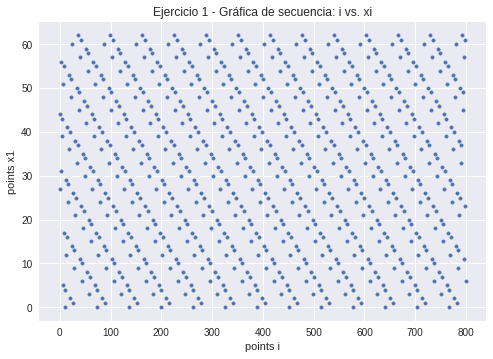

In [0]:
j = [i for i in range(0,np.size(x1),1)]

plt.scatter(j, np.squeeze(x1), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia: i vs. xi")
plt.xlabel('points i')
plt.ylabel('points x1')

plt.show()

In [0]:
v = [u-1 for u in range(1,np.size(x1),2)] 
w = [u for u in range(1,np.size(x1),2)] 
print('Secuencia de índices pares x(i): \n', v)
print('Secuencia de índices impares x(i+1): \n', w)


Secuencia de índices pares x(i): 
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406,

In [0]:
print('Números de secuencia xi: \n')
print(np.squeeze(x1[:,v]))
print('Números de secuencia xi + 1: \n')
print(np.squeeze(x1[:,w]))

Números de secuencia xi: 

[44. 31. 39.  5. 55.  0. 29. 16. 24. 53. 40. 48. 14.  1.  9. 38. 25. 33.
 62. 49. 57. 23. 10. 18. 47. 34. 42.  8. 58.  3. 32. 19. 27. 56. 43. 51.
 17.  4. 12. 41. 28. 36.  2. 52. 60. 26. 13. 21. 50. 37. 45. 11. 61.  6.
 35. 22. 30. 59. 46. 54. 20.  7. 15. 44. 31. 39.  5. 55.  0. 29. 16. 24.
 53. 40. 48. 14.  1.  9. 38. 25. 33. 62. 49. 57. 23. 10. 18. 47. 34. 42.
  8. 58.  3. 32. 19. 27. 56. 43. 51. 17.  4. 12. 41. 28. 36.  2. 52. 60.
 26. 13. 21. 50. 37. 45. 11. 61.  6. 35. 22. 30. 59. 46. 54. 20.  7. 15.
 44. 31. 39.  5. 55.  0. 29. 16. 24. 53. 40. 48. 14.  1.  9. 38. 25. 33.
 62. 49. 57. 23. 10. 18. 47. 34. 42.  8. 58.  3. 32. 19. 27. 56. 43. 51.
 17.  4. 12. 41. 28. 36.  2. 52. 60. 26. 13. 21. 50. 37. 45. 11. 61.  6.
 35. 22. 30. 59. 46. 54. 20.  7. 15. 44. 31. 39.  5. 55.  0. 29. 16. 24.
 53. 40. 48. 14.  1.  9. 38. 25. 33. 62. 49. 57. 23. 10. 18. 47. 34. 42.
  8. 58.  3. 32. 19. 27. 56. 43. 51. 17.  4. 12. 41. 28. 36.  2. 52. 60.
 26. 13. 21. 50. 37. 45.

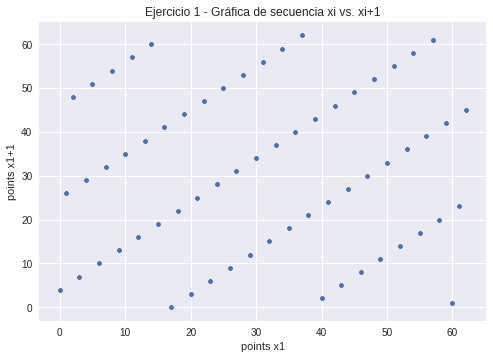

In [0]:
plt.scatter(np.squeeze(x1[:,v]),np.squeeze(x1[:,w]), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia xi vs. xi+1")
plt.xlabel('points x1')
plt.ylabel('points x1+1')

plt.show()

**Observaciones:**

- Primero,....
- Segundo,....

In [0]:
# Caso de estudio número dos de generador congruencial
# ----------------------------------------------------------------
a = 37;     # Factor multiplicativo del generador congruencial
b = 1;      # Factor de sesgo del generador congruencial
m = 64;     # Factor de módulo del generador congruencial
x0 = 10     # Semilla del generador
total = 800  # Cantidad total de números a generar 
print("Factor multiplicativo del generador congruencial: \n", a)
print("Factor de sesgo del generador congruencial: \n", b)
print("Factor de módulo del generador congruencial: \n", m)
print("Semilla del generador congruencial: \n", x0)
print("Total de números de la secuencia generada: \n", total)
x2 = gen_congruencial(a,b,m,x0, total)
print("Nube de puntos generada: \n", np.squeeze(x2))
print('Dimensiones de la nube: \n', x2.shape)

Factor multiplicativo del generador congruencial: 
 37
Factor de sesgo del generador congruencial: 
 1
Factor de módulo del generador congruencial: 
 64
Semilla del generador congruencial: 
 10
Total de números de la secuencia generada: 
 800
Nube de puntos generada: 
 [51. 32. 33.  6. 31. 60. 45.  2. 11. 24. 57. 62. 55. 52.  5. 58. 35. 16.
 17. 54. 15. 44. 29. 50. 59.  8. 41. 46. 39. 36. 53. 42. 19.  0.  1. 38.
 63. 28. 13. 34. 43. 56. 25. 30. 23. 20. 37. 26.  3. 48. 49. 22. 47. 12.
 61. 18. 27. 40.  9. 14.  7.  4. 21. 10. 51. 32. 33.  6. 31. 60. 45.  2.
 11. 24. 57. 62. 55. 52.  5. 58. 35. 16. 17. 54. 15. 44. 29. 50. 59.  8.
 41. 46. 39. 36. 53. 42. 19.  0.  1. 38. 63. 28. 13. 34. 43. 56. 25. 30.
 23. 20. 37. 26.  3. 48. 49. 22. 47. 12. 61. 18. 27. 40.  9. 14.  7.  4.
 21. 10. 51. 32. 33.  6. 31. 60. 45.  2. 11. 24. 57. 62. 55. 52.  5. 58.
 35. 16. 17. 54. 15. 44. 29. 50. 59.  8. 41. 46. 39. 36. 53. 42. 19.  0.
  1. 38. 63. 28. 13. 34. 43. 56. 25. 30. 23. 20. 37. 26.  3. 48. 49. 22.


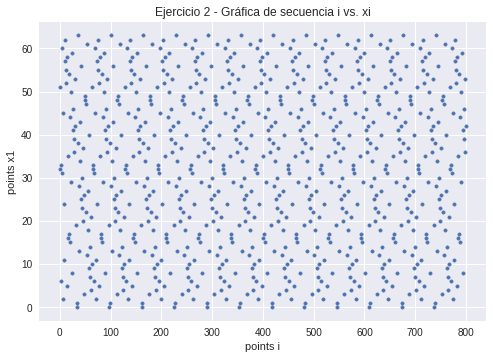

In [0]:
j = [i for i in range(0,np.size(x2),1)]

plt.scatter(j, np.squeeze(x2), marker='.')
plt.title("Ejercicio 2 - Gráfica de secuencia i vs. xi")
plt.xlabel('points i')
plt.ylabel('points x1')

plt.show()

In [0]:
v = [u-1 for u in range(1,np.size(x2),2)] 
w = [u for u in range(1,np.size(x2),2)] 
print('Números de secuencia xi: \n')
print(np.squeeze(x2[:,v]))
print('Números de secuencia xi + 1: \n')
print(np.squeeze(x2[:,w]))

Números de secuencia xi: 

[51. 33. 31. 45. 11. 57. 55.  5. 35. 17. 15. 29. 59. 41. 39. 53. 19.  1.
 63. 13. 43. 25. 23. 37.  3. 49. 47. 61. 27.  9.  7. 21. 51. 33. 31. 45.
 11. 57. 55.  5. 35. 17. 15. 29. 59. 41. 39. 53. 19.  1. 63. 13. 43. 25.
 23. 37.  3. 49. 47. 61. 27.  9.  7. 21. 51. 33. 31. 45. 11. 57. 55.  5.
 35. 17. 15. 29. 59. 41. 39. 53. 19.  1. 63. 13. 43. 25. 23. 37.  3. 49.
 47. 61. 27.  9.  7. 21. 51. 33. 31. 45. 11. 57. 55.  5. 35. 17. 15. 29.
 59. 41. 39. 53. 19.  1. 63. 13. 43. 25. 23. 37.  3. 49. 47. 61. 27.  9.
  7. 21. 51. 33. 31. 45. 11. 57. 55.  5. 35. 17. 15. 29. 59. 41. 39. 53.
 19.  1. 63. 13. 43. 25. 23. 37.  3. 49. 47. 61. 27.  9.  7. 21. 51. 33.
 31. 45. 11. 57. 55.  5. 35. 17. 15. 29. 59. 41. 39. 53. 19.  1. 63. 13.
 43. 25. 23. 37.  3. 49. 47. 61. 27.  9.  7. 21. 51. 33. 31. 45. 11. 57.
 55.  5. 35. 17. 15. 29. 59. 41. 39. 53. 19.  1. 63. 13. 43. 25. 23. 37.
  3. 49. 47. 61. 27.  9.  7. 21. 51. 33. 31. 45. 11. 57. 55.  5. 35. 17.
 15. 29. 59. 41. 39. 53.

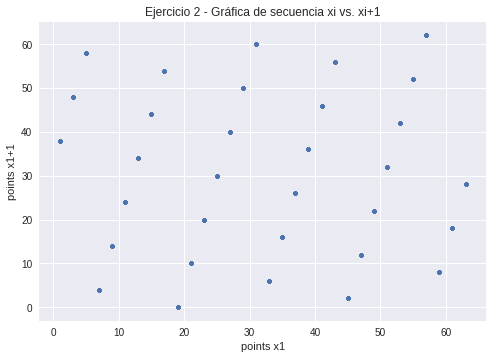

In [0]:
plt.scatter(np.squeeze(x2[:,v]),np.squeeze(x2[:,w]), marker='.')
plt.title("Ejercicio 2 - Gráfica de secuencia xi vs. xi+1")
plt.xlabel('points x1')
plt.ylabel('points x1+1')

plt.show()

**Observaciones:**

- Primero,....
- Segundo,....

<font color='red'>
**Ejercicio.**
A partir de las nubes de puntos generadas por <font color='blue'><code>gen_congruencial(a, b, m, x0, total)</code></font color='blue'>, estúdiese las gráficas **(u(i), u(i+1))** e **(i, u(i))** para el siguiente generador congruencial:

- $a = 2^{31} - 1, b = 1, m = 16807, \text{siendo } x_0 = 10$

Genere una nube de 1500 puntos

In [0]:
# Caso de estudio número tres de generador congruencial
# ----------------------------------------------------------------
a = np.power(2,31) - 1; # Factor multiplicativo del generador congruencial
b = 1;                  # Factor de sesgo del generador congruencial
m = 16807;              # Factor de módulo del generador congruencial
x0 = 10                 # Semilla del generador
total = 1500            # Cantidad total de números a generar 
print("Factor multiplicativo del generador congruencial: \n", a)
print("Factor de sesgo del generador congruencial: \n", b)
print("Factor de módulo del generador congruencial: \n", m)
print("Semilla del generador congruencial: \n", x0)
print("Total de números de la secuencia generada: \n", total)
x3 = gen_congruencial(a,b,m,x0, total)
print("Nube de puntos generada: \n", np.squeeze(x3))
print('Dimensiones de la nube: \n', x3.shape)

Factor multiplicativo del generador congruencial: 
 2147483647
Factor de sesgo del generador congruencial: 
 1
Factor de módulo del generador congruencial: 
 16807
Semilla del generador congruencial: 
 10
Total de números de la secuencia generada: 
 1500
Nube de puntos generada: 
 [11554. 10302.  5907. ... 11651. 16482.  2686.]
Dimensiones de la nube: 
 (1, 1500)


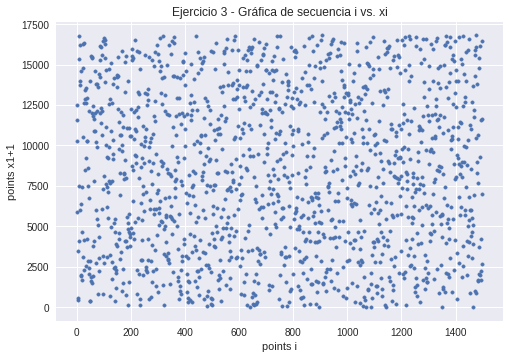

In [0]:
j = [i for i in range(0,np.size(x3),1)]

plt.scatter(j, np.squeeze(x3), marker='.')
plt.title("Ejercicio 3 - Gráfica de secuencia i vs. xi")
plt.xlabel('points i')
plt.ylabel('points x1+1')

plt.show()

In [0]:
v = [u-1 for u in range(1,np.size(x3),2)] 
w = [u for u in range(1,np.size(x3),2)] 
print('Números de secuencia xi: \n')
print(np.squeeze(x3[:,v]))
print('Números de secuencia xi + 1: \n')
print(np.squeeze(x3[:,w]))


Números de secuencia xi: 

[1.1554e+04 5.9070e+03 5.7500e+02 3.4960e+03 7.5160e+03 1.6800e+04
 6.0150e+03 1.3969e+04 1.9520e+03 1.4603e+04 4.6370e+03 1.0519e+04
 1.4805e+04 4.1670e+03 1.2611e+04 1.3432e+04 1.2853e+04 9.2080e+03
 2.5460e+03 4.2350e+03 1.2952e+04 7.4800e+03 6.7330e+03 1.2132e+04
 4.0200e+02 4.0400e+02 1.8970e+03 1.5563e+04 1.5383e+04 1.5469e+04
 1.2440e+04 1.1833e+04 4.0930e+03 7.7910e+03 1.2000e+04 2.7060e+03
 6.0260e+03 1.3777e+04 9.8870e+03 1.3613e+04 5.1100e+03 2.2630e+03
 3.0630e+03 1.2018e+04 1.6143e+04 1.1371e+04 1.2157e+04 1.0661e+04
 3.1590e+03 1.6454e+04 1.6638e+04 2.7310e+03 1.6285e+04 1.6532e+04
 7.6370e+03 1.4688e+04 9.2650e+03 3.0790e+03 7.1550e+03 7.8220e+03
 9.9310e+03 1.2845e+04 3.2360e+03 1.5110e+04 4.9550e+03 1.2608e+04
 2.7890e+03 9.1610e+03 9.4780e+03 2.4170e+03 3.7500e+02 5.4590e+03
 2.2830e+03 1.1860e+03 1.4222e+04 1.4343e+04 1.2231e+04 1.5481e+04
 4.5910e+03 9.7940e+03 3.0130e+03 8.3070e+03 1.0633e+04 1.5871e+04
 1.0007e+04 2.3510e+03 1.5270e+03 8

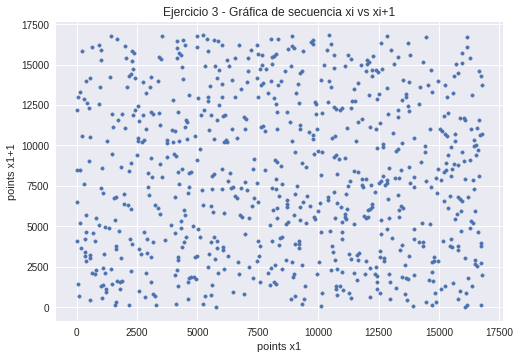

In [0]:
plt.scatter(np.squeeze(x3[:,v]),np.squeeze(x3[:,w]), marker='.')
plt.title("Ejercicio 3 - Gráfica de secuencia xi vs xi+1")
plt.xlabel('points x1')
plt.ylabel('points x1+1')

plt.show()

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

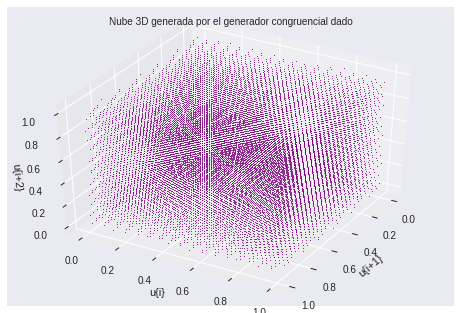

In [0]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
fig.gca(projection='3d')

N = 100000
secuencia = np.empty(N+2,float)

m = 16807
a = 2**31 - 1
b = 1;                  # Factor de sesgo del generador congruencial
semilla = 10

u = semilla 

for i in range(N+2):
    u =  gen_congruencial(a,b,m,u, 1)
    secuencia[i]=u/m

ax.scatter(secuencia[1:N+1],secuencia[0:N],secuencia[2:N+2], depthshade=False, s=0.2, marker='.', color='purple')

plt.figure(1)
ax.set_xlabel('u{i+1}')
ax.set_ylabel('u{i}')
ax.set_zlabel('u{i+2}')
ax.view_init(azim=30, elev=40) # probar modificar los ángulos de azimut y elevación

plt.title("Nube 3D generada por el generador congruencial dado", fontsize=10)

plt.show()


**Observaciones:**

- Primero,....
- Segundo,....

## Deber: Otros generadores eficientes y portables (grupo de 3 estudiantes)

### Realizar a continuación del presente notebook, el análisis de los siguientes generadores de números aleatorios 

Existen otras formas de mejorar la eficiencia de los generadores construidos a partir de un generador congruencial. En el artículo de Marsaglia y Zaman (ver Referencias) se presenta una extensa lista de generadores candidatos a ser combinados para obtener aún mejores generadores. Algunos son los siguientes:

  - M=$2^{32}$,     $x_n=69069\,x_{n-1}+$ impar,    Período $K=2^{32}$
  - M=$2^{32}$,     $x_n=x_{n-1}*x_{n-2}$,          Período $K=2^{31}$
  - M=$2^{32}$,     $x_n=x_{n-1}+x_{n-2}+C$,        Período $K=2^{58}$ 
  - M=$2^{31}-69$,  $x_n=x_{n-3}-x_{n-1}$,          Período $K=2^{62}$
  - M=$2^{32}-18$,  $x_n=x_{n-2}-x_{n-3}-C$,        Período $K=2^{95}$
 

La constante $C$ indica un $0$ o un $1$ según corresponda, para acarreos o préstamos.

## - M=$2^{32}$,     $x_n=69069\,x_{n-1}+$ impar,    Período $K=2^{32}$

In [0]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def gen_congruencial(a, b, m, x0, total):
    """"
    Función que implementa la expresión para generar una secuencia 
    de números seudoaleatorios, mediante un generador congruencial
    Entradas:
    a = factor multiplicativo
    b = factor de sesgo
    m = factor de módulo
    x0 = semilla del generador
    max = número total de números de la secuencia
    Salida:
    xf = secuencia de números aleatorios generada
    """
    x = np.zeros([total,1])
    for i in range(0,total):
        x[i] = np.mod((a*x0 + b), m)
        x0 = x[i]
    xf = x.T 
    return xf

In [0]:
# Caso de estudio número uno de generador congruencial
# ----------------------------------------------------------------
a = 69069;     # Factor multiplicativo del generador congruencial
b = 9;      # Factor de sesgo del generador congruencial
m = np.power(2,32) ;     # Factor de módulo del generador congruencial
x0 = 19     # Semilla del generador
total = 1500  # Cantidad total de números a generar 
print("Factor multiplicativo del generador congruencial: \n", a)
print("Factor de sesgo del generador congruencial: \n", b)
print("Factor de módulo del generador congruencial: \n", m)
print("Semilla del generador congruencial: \n", x0)
print("Total de números de la secuencia generada: \n", total)
x1 = gen_congruencial(a,b,m,x0, total)
print("Nube de puntos generada: \n", np.squeeze(x1))
print('Dimensiones de la nube: \n', x1.shape)

Factor multiplicativo del generador congruencial: 
 69069
Factor de sesgo del generador congruencial: 
 9
Factor de módulo del generador congruencial: 
 4294967296
Semilla del generador congruencial: 
 19
Total de números de la secuencia generada: 
 1500
Nube de puntos generada: 
 [1.31232000e+06 4.46316873e+08 1.67981785e+09 ... 4.17017221e+09
 5.27499078e+08 3.92121372e+09]
Dimensiones de la nube: 
 (1, 1500)


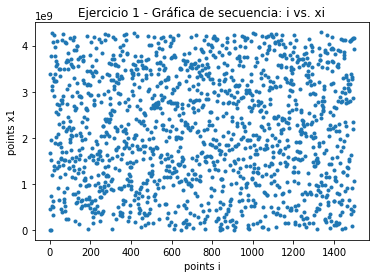

In [0]:
j = [i for i in range(0,np.size(x1),1)]

plt.scatter(j, np.squeeze(x1), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia: i vs. xi")
plt.xlabel('points i')
plt.ylabel('points x1')

plt.show()

In [0]:
v = [u-1 for u in range(1,np.size(x1),2)] 
w = [u for u in range(1,np.size(x1),2)] 
print('Secuencia de índices pares x(i): \n', v)
print('Secuencia de índices impares x(i+1): \n', w)

Secuencia de índices pares x(i): 
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406,

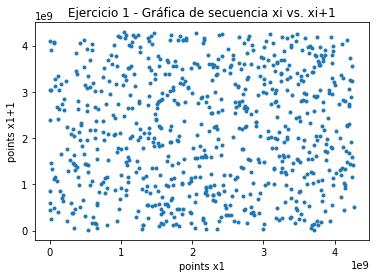

In [0]:
plt.scatter(np.squeeze(x1[:,v]),np.squeeze(x1[:,w]), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia xi vs. xi+1")
plt.xlabel('points x1')
plt.ylabel('points x1+1')

plt.show()

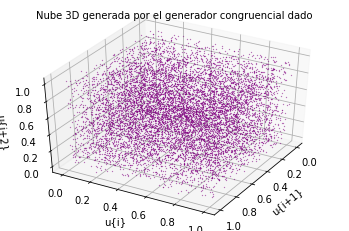

In [0]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
fig.gca(projection='3d')

N = 10000
secuencia = np.empty(N+2,float)

m = np.power(2,32)
a = 69069
b = 9;                  # Factor de sesgo del generador congruencial
semilla = 19

u = semilla 

for i in range(N+2):
    u =  gen_congruencial(a,b,m,u, 1)
    secuencia[i]=u/m

ax.scatter(secuencia[1:N+1],secuencia[0:N],secuencia[2:N+2], depthshade=False, s=0.2, marker='.', color='purple')

plt.figure(1)
ax.set_xlabel('u{i+1}')
ax.set_ylabel('u{i}')
ax.set_zlabel('u{i+2}')
ax.view_init(azim=30, elev=40) # probar modificar los ángulos de azimut y elevación

plt.title("Nube 3D generada por el generador congruencial dado", fontsize=10)

plt.show()

## - M=$2^{31}-69$,  $x_n=x_{n-3}-x_{n-1}$,          Período $K=2^{62}$

In [0]:
# Caso de estudio número uno de generador congruencial
# ----------------------------------------------------------------
a = 60;     # Factor multiplicativo del generador congruencial
b = 6;      # Factor de sesgo del generador congruencial
m = (np.power(2,31) - 69) ;     # Factor de módulo del generador congruencial
x0 = 19     # Semilla del generador
total = 1500  # Cantidad total de números a generar 
print("Factor multiplicativo del generador congruencial: \n", a)
print("Factor de sesgo del generador congruencial: \n", b)
print("Factor de módulo del generador congruencial: \n", m)
print("Semilla del generador congruencial: \n", x0)
print("Total de números de la secuencia generada: \n", total)
x1 = gen_congruencial(a,b,m,x0, total)
print("Nube de puntos generada: \n", np.squeeze(x1))
print('Dimensiones de la nube: \n', x1.shape)

Factor multiplicativo del generador congruencial: 
 60
Factor de sesgo del generador congruencial: 
 6
Factor de módulo del generador congruencial: 
 2147483579
Semilla del generador congruencial: 
 19
Total de números de la secuencia generada: 
 1500
Nube de puntos generada: 
 [1.14600000e+03 6.87660000e+04 4.12596600e+06 ... 2.09605244e+09
 1.20909870e+09 1.67896414e+09]
Dimensiones de la nube: 
 (1, 1500)


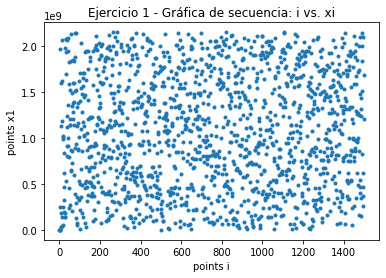

In [0]:
plt.scatter(j, np.squeeze(x1), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia: i vs. xi")
plt.xlabel('points i')
plt.ylabel('points x1')

plt.show()

In [0]:
v = [u-1 for u in range(1,np.size(x1),2)] 
w = [u for u in range(1,np.size(x1),2)] 
print('Secuencia de índices pares x(i): \n', v)
print('Secuencia de índices impares x(i+1): \n', w)

Secuencia de índices pares x(i): 
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406,

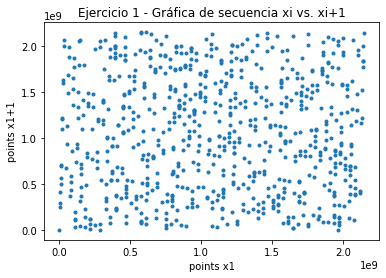

In [0]:
plt.scatter(np.squeeze(x1[:,v]),np.squeeze(x1[:,w]), marker='.')
plt.title("Ejercicio 1 - Gráfica de secuencia xi vs. xi+1")
plt.xlabel('points x1')
plt.ylabel('points x1+1')

plt.show()

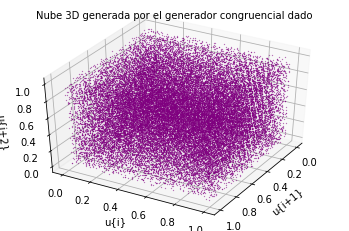

In [0]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
fig.gca(projection='3d')

N = 40000
secuencia = np.empty(N+2,float)

m = (np.power(2,31) - 69)
a = 60
b = 6;                  # Factor de sesgo del generador congruencial
semilla = 19

u = semilla 

for i in range(N+2):
    u =  gen_congruencial(a,b,m,u, 1)
    secuencia[i]=u/m

ax.scatter(secuencia[1:N+1],secuencia[0:N],secuencia[2:N+2], depthshade=False, s=0.2, marker='.', color='purple')

plt.figure(1)
ax.set_xlabel('u{i+1}')
ax.set_ylabel('u{i}')
ax.set_zlabel('u{i+2}')
ax.view_init(azim=30, elev=40) # probar modificar los ángulos de azimut y elevación

plt.title("Nube 3D generada por el generador congruencial dado", fontsize=10)

plt.show()

## CONCLUSION
#  M=$2^{31}-69$,  $x_n=x_{n-3}-x_{n-1}$,          Período $K=2^{62}$ 

Valores de los parametros: 

* a = 69069;     # Factor multiplicativo del generador congruencial
* b = 9;      # Factor de sesgo del generador congruencial
* m = np.power(2,32) ;     # Factor de módulo del generador congruencial
* x0 = 19     # Semilla del generador
* total = 1500  # Cantidad total de números a generar 


Como podemos notar que en todas sus graficas son de manera aleatoria,es decir, no existe algun periodo en la generacion de los valores aleatorios, la cantidad de numeros generados es de 1500 esto hace que en la grafica de 2 dimensiones, cubra todo el plano mientras que en la grafica de 3 dimensiones, se genera un cubo, ya que existe aleatoridad uniforme en todo el dominio.

# M=$2^{31}-69$,  $x_n=x_{n-3}-x_{n-1}$,          Período $K=2^{62}$ 

Valores de los parametros: 


* a = 60;     # Factor multiplicativo del generador congruencial
* b = 6;      # Factor de sesgo del generador congruencial
* m = (np.power(2,31) - 69) ;     # Factor de módulo del generador congruencial
* x0 = 19     # Semilla del generador
* total = 1500  # Cantidad total de números a generar 

La grafica x(i) vs.x(i+1) si no se toman los valores correctos aparentemente    es aletoria pero en la grafica i vs. x(i)  se notaba claramente un patron asi mismo en la grafica R3 x(i) vs.x(i+1) vs.x(i+2) se nota un patron, esto indica que en una grafica puede engañarnos, por lo tanto la eleccion de los variables de entrada "a" , "b" son de mucha influencia, si los valores de estas 2 ultimas variables son muy cercanas, en las graficas se generan patrones muy visibles perdiendo calidad en la generacion de numeros aleatorios.
Una vez cambiados estos valores, se puede ver una nueva grafica con una aleatoriedad muy buena.


En los 2 ejercicios no se utilizo la variable "C" que corresponde al incremento
